# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Constants
usetex = True
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
if usetex:
    plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
        'font.serif': ['Times'],
        'font.size': SMALL_SIZE,          # controls default text sizes
        'axes.titlesize': SMALL_SIZE,     # fontsize of the axes title
        'axes.labelsize': MEDIUM_SIZE,    # fontsize of the x and y labels
        'xtick.labelsize': SMALL_SIZE,    # fontsize of the tick labels
        'ytick.labelsize': SMALL_SIZE,    # fontsize of the tick labels
        'legend.fontsize': SMALL_SIZE,    # legend fontsize
        'figure.titlesize': BIGGER_SIZE,  # fontsize of the figure title
    })
    
FIG_SIZE=(12,4)
DEFAULT_PALETTE = sns.color_palette("Greys_r", 5)

# Experiments 1 and 2

### Experiment Data

In [3]:
## Experiment 1
exp1_data = {
    'cores': [120, 240, 480, 960, 
              120, 240, 480, 960, 
              120, 240, 480, 960],
    'threads': [12, 12, 12, 12,
            24, 24, 24, 24,
            48, 48, 48, 48],
    'time': [283.35, 143.11, 74.22, 39.51,
            143.21, 74.25, 39.50, 22.55,
            74.33, 40.05, 22.66, 13.89]
}
exp1_df = pd.DataFrame(exp1_data)

exp1_linear_data = {
    'cores': [120, 240, 480, 960, 
              120, 240, 480, 960, 
              120, 240, 480, 960],
    'threads': ['Linear 12', 'Linear 12', 'Linear 12', 'Linear 12', 
                'Linear 24', 'Linear 24', 'Linear 24', 'Linear 24', 
                'Linear 48', 'Linear 48', 'Linear 48', 'Linear 48'],
    'time': [283.35, 141.68, 70.84, 35.42,
            143.21, 71.60, 35.80, 17.90,
            74.33, 37.16, 18.58, 9.29]
}
exp1_linear_df = pd.DataFrame(exp1_linear_data)



## Experiment 2

exp2_data = {
    'cores': [240, 480, 936],
    'tasks': [6.0, 12.0, 23.4],
    'linear_time': [29.16, 29.16, 29.16],
    'time': [29.16, 32.73, 39.64]
}

exp2_df = pd.DataFrame(exp2_data)

print("Exp1")
display(exp1_df)
print("Exp1 Linear")
display(exp1_linear_df)
print("Exp2")
display(exp2_df)

Exp1


,cores,threads,time
0,120,12,283.35
1,240,12,143.11
2,480,12,74.22
3,960,12,39.51
4,120,24,143.21
5,240,24,74.25
6,480,24,39.50
7,960,24,22.55
8,120,48,74.33
9,240,48,40.05


Exp1 Linear


,cores,threads,time
0,120,Linear 12,283.35
1,240,Linear 12,141.68
2,480,Linear 12,70.84
3,960,Linear 12,35.42
4,120,Linear 24,143.21
5,240,Linear 24,71.60
6,480,Linear 24,35.80
7,960,Linear 24,17.90
8,120,Linear 48,74.33
9,240,Linear 48,37.16


Exp2


,cores,tasks,linear_time,time
0,240,6.0,29.16,29.16
1,480,12.0,29.16,32.73
2,936,23.4,29.16,39.64


### Exps 1 and 2 Plots

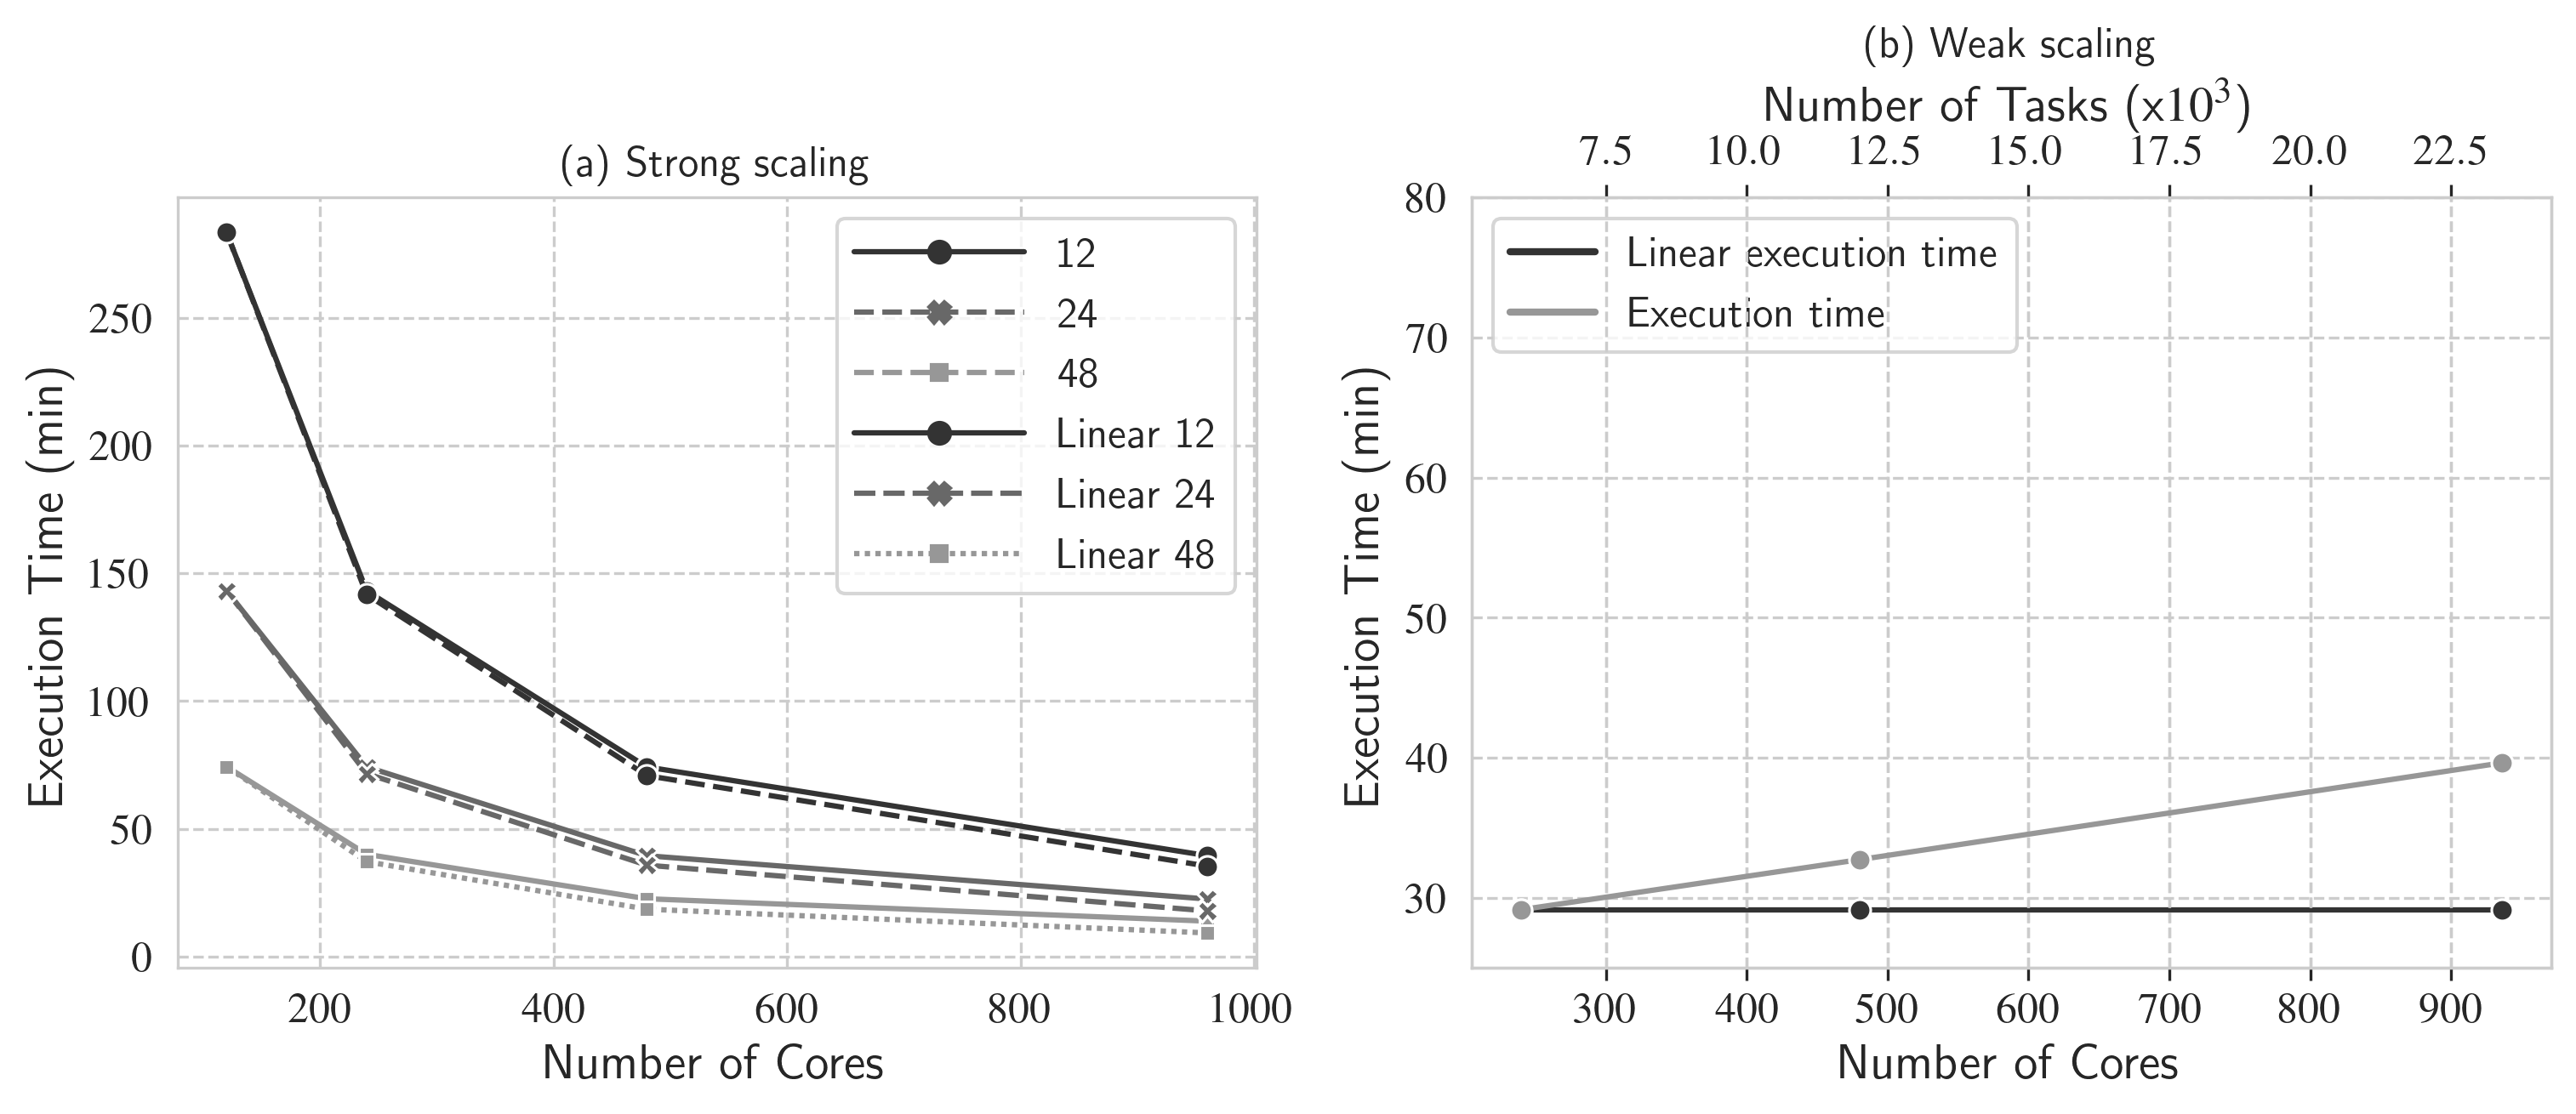

In [4]:
sns.set_style("whitegrid", {
    "ytick.major.size": 0.1,
    "ytick.minor.size": 0.05,
    'grid.linestyle': '--'
})

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=FIG_SIZE, dpi=300)

palette = DEFAULT_PALETTE[:3]

# Exp1 - Strong scaling
index = 0

axs[index].set_title("(a) Strong scaling")

sns.lineplot(data=exp1_df, x='cores', y='time', hue='threads', 
             style="threads", markers=True, dashes=False, 
             palette=palette, ax=axs[index])

temp_ax = sns.lineplot(data=exp1_linear_df, x='cores', y='time', hue='threads', 
             style="threads", dashes=True, markers=True, 
             palette=palette, ax=axs[index])

axs[index].lines[4].set_linestyle("--")
axs[index].lines[5].set_linestyle("--")
axs[index].lines[6].set_linestyle("--")

axs[index].set_xlabel("Number of Cores", fontweight="bold")
axs[index].set_ylabel("Execution Time (min)", fontweight="bold")
axs[index].legend(fontsize=SMALL_SIZE, handlelength=4)

# Exp2 - Weak scaling
index += 1

axs[index].set_title("(b) Weak scaling")

sns.lineplot(data=exp2_df, x='cores', y='linear_time', 
             style="linear_time", dashes=True, markers=True, 
             ax=axs[index], color=palette[0])

twin_axis = axs[index].twiny()

ax = sns.lineplot(data=exp2_df, x='tasks', y='time', 
                 style="linear_time", dashes=True, markers=True, 
                 ax=twin_axis, color=palette[2])
ax.legend([],[], frameon=False)

axs[index].set_xlabel("Number of Cores", fontweight="bold")
axs[index].set_ylabel("Execution Time (min)", fontweight="bold")
axs[index].legend(fontsize=SMALL_SIZE)

twin_axis.set_xlabel("Number of Tasks (x$10^3$)")

custom_lines = [Line2D([0], [0], color=palette[0], lw=2),
                Line2D([0], [0], color=palette[2], lw=2)]

ymax = 80
axs[index].set_ylim(25,ymax)
twin_axis.set_ylim(25,ymax)

axs[index].legend(custom_lines, ['Linear execution time', 'Execution time'], loc='upper left')
plt.savefig('exps1and2.pdf', format='pdf', dpi=1000, bbox_inches = 'tight')
# twin_axis.ticklabel_format(axis="x", style="sci", scilimits=(-1,2))

## Experiments 3 and 4

### Experiment Data

In [5]:
## Experiment 3

exp3_data = {
    'tasks': [4.682, 4.682, 
              12.170, 12.170, 
              23.402, 23.402],
    'task_duration': ['5s', '60s'] * 3,
    'linear_task_duration': ['5s linear', '60s linear'] * 3,
    'time': [3.12, 7.78,
             8.33, 20.47,
             16.58, 39.64],
    'linear_time': [3.12, 7.78,
                    8.11, 20.23,
                    15.59, 38.91]
}
exp3_df = pd.DataFrame(exp3_data)


## Experiment 4

exp4_data = {
    'task_duration': [5, 30, 60, 120] * 2,
    'tasks': ['4k tasks'] * 4 + ['23k tasks'] * 4,
    'linear_tasks': ['linear 4k tasks'] * 4 + ['linear 23k tasks'] * 4,
    'time': [3.12, 5.22, 7.78, 13.75,
             16.58, 27.00, 39.64, 63.21],
    'linear_time': [0.57, 3.44, 6.88, 13.75,
                    2.63, 15.80, 31.60, 63.21]
}
exp4_df = pd.DataFrame(exp4_data)

print("Exp3")
display(exp3_df)
print("Exp4")
display(exp4_df)

Exp3


,tasks,task_duration,linear_task_duration,time,linear_time
0,4.682,5s,5s linear,3.12,3.12
1,4.682,60s,60s linear,7.78,7.78
2,12.170,5s,5s linear,8.33,8.11
3,12.170,60s,60s linear,20.47,20.23
4,23.402,5s,5s linear,16.58,15.59
5,23.402,60s,60s linear,39.64,38.91


Exp4


,task_duration,tasks,linear_tasks,time,linear_time
0,5,4k tasks,linear 4k tasks,3.12,0.57
1,30,4k tasks,linear 4k tasks,5.22,3.44
2,60,4k tasks,linear 4k tasks,7.78,6.88
3,120,4k tasks,linear 4k tasks,13.75,13.75
4,5,23k tasks,linear 23k tasks,16.58,2.63
5,30,23k tasks,linear 23k tasks,27.00,15.80
6,60,23k tasks,linear 23k tasks,39.64,31.60
7,120,23k tasks,linear 23k tasks,63.21,63.21


### Exps 3 and 4 Plots

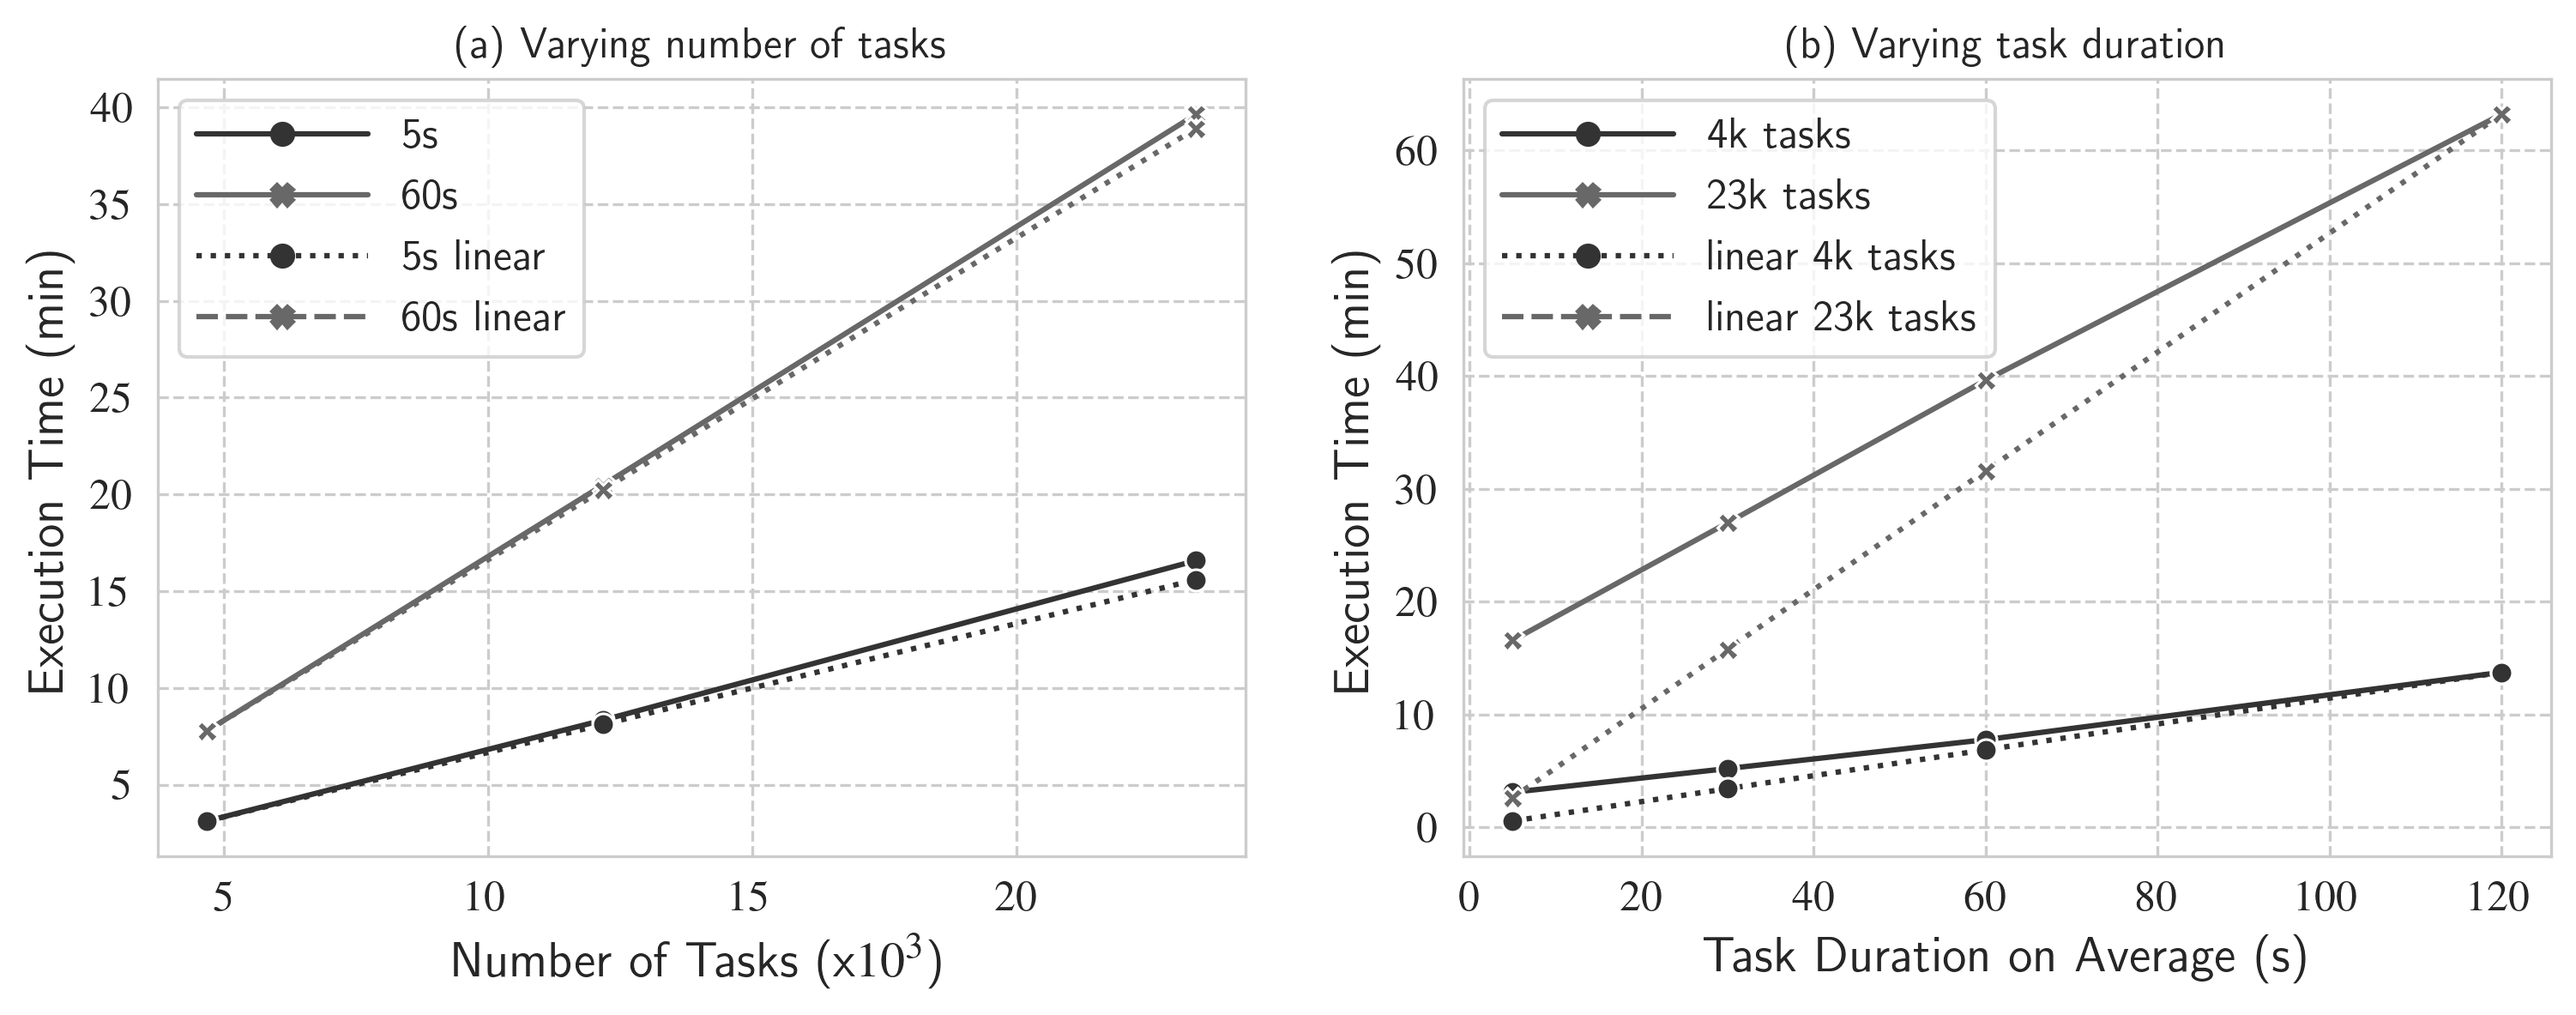

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=FIG_SIZE, dpi=300)

# Exp3 - Varying number of tasks
index = 0
palette = DEFAULT_PALETTE[:2]

axs[index].set_title("(a) Varying number of tasks")

sns.lineplot(data=exp3_df, x='tasks', y='time', hue='task_duration', 
             style="task_duration", markers=True, dashes=False, 
             palette=palette, ax=axs[index])

temp_ax = sns.lineplot(data=exp3_df, x='tasks', y='linear_time', hue='linear_task_duration', 
             style="linear_task_duration", dashes=True, markers=True, 
             palette=palette, ax=axs[index])

axs[index].lines[4].set_linestyle("dotted")
axs[index].lines[5].set_linestyle("dotted")
axs[index].lines[6].set_linestyle("dotted")

axs[index].set_xlabel("Number of Tasks (x$10^3$)", fontweight="bold")
axs[index].set_ylabel("Execution Time (min)", fontweight="bold")
axs[index].legend(fontsize=SMALL_SIZE, handlelength=4)

# Exp2 - Weak scaling
index += 1
axs[index].set_title("(b) Varying task duration")

sns.lineplot(data=exp4_df, x='task_duration', y='time', hue='tasks', 
             style="tasks", markers=True, dashes=False, 
             palette=palette, ax=axs[index])

temp_ax = sns.lineplot(data=exp4_df, x='task_duration', y='linear_time', hue='linear_tasks', 
             style="linear_tasks", dashes=True, markers=True, 
             palette=palette, ax=axs[index])

axs[index].lines[4].set_linestyle("dotted")
axs[index].lines[5].set_linestyle("dotted")
axs[index].lines[6].set_linestyle("dotted")

axs[index].set_xlabel("Task Duration on Average (s)", fontweight="bold")
axs[index].set_ylabel("Execution Time (min)", fontweight="bold")
axs[index].legend(fontsize=SMALL_SIZE, handlelength=4)
plt.savefig('exps3and4.pdf', format='pdf', dpi=1000, bbox_inches = 'tight')

# Experiment 5

In [7]:
df = pd.read_csv("data/exp5.csv")
df

,Mean task duration (s),Total time (s),Total time (min),DBMS time (s),DBMS time (min)
0,1,945,15.750000,796.637,13.277283
1,2,937,15.616667,740.303,12.338383
2,3,942,15.700000,696.368,11.606133
3,4,967,16.116667,662.553,11.042550
4,5,1006,16.766667,643.179,10.719650
5,10,1137,18.950000,646.814,10.780233
6,30,1639,27.316667,644.531,10.742183
7,60,2383,39.716667,653.127,10.885450


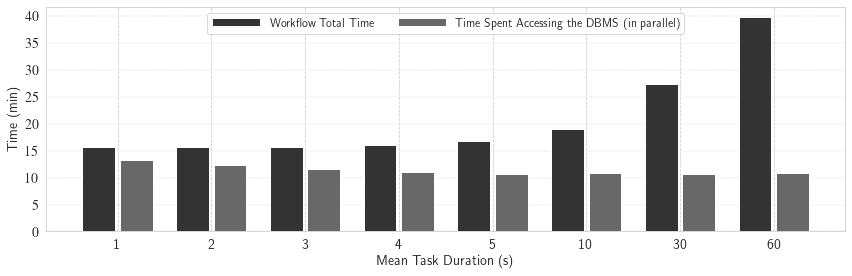

In [8]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=FIG_SIZE, nrows=1, ncols=1)
palette = DEFAULT_PALETTE[:2]

x = np.arange(len( df['Mean task duration (s)']))
width = 0.35
sft = 0.2

ax.grid('on', which='major', axis='y',linestyle='--', linewidth=0.4, zorder=0) 
ax.bar(x=x-sft, 
        height=df['Total time (min)'],
        width=width,
        color=palette[0],
        label='Workflow Total Time',
        zorder=2
      )
ax.bar(x=x+sft, 
        height=df['DBMS time (min)'],
        width=width,
        color=palette[1],
        label='Time Spent Accessing the DBMS (in parallel)',
        zorder=2
      )

ax.legend(ncol=2, loc='upper center', fontsize=SMALL_SIZE, handlelength=4)#, loc=(0, .7))
ax.set_ylabel("Time (min)", fontsize=MEDIUM_SIZE, fontweight="bold")
ax.set_xlabel("Mean Task Duration (s)", fontsize=MEDIUM_SIZE, fontweight="bold")
ax.set_axisbelow(True)


ax.set_xticklabels(df['Mean task duration (s)'], fontsize=MEDIUM_SIZE)
plt.xticks(range(0,len(x)), fontsize=MEDIUM_SIZE)
plt.yticks(fontsize=MEDIUM_SIZE)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)
plt.savefig('exp5.pdf', format='pdf', dpi=1000, bbox_inches = 'tight')

# Experiment 6

In [9]:
#"Function": Time (%)
exp6_data = {
"getREADYtasks": 41.04528358,
"insertTasks": 30.08422052,
"updateTasksToFINISHED": 5.432542128,
"taskIDInDomain-FINISHED": 4.311608831,
"storeOutputDomainData": 3.005624146,
"taskIDInDomain-RUNNING": 2.367772371,
"updateTasksToRUNNING": 2.350595352,
"taskIDInDomain-READY": 1.559389986,
"getFileFields": 1.350078271
}

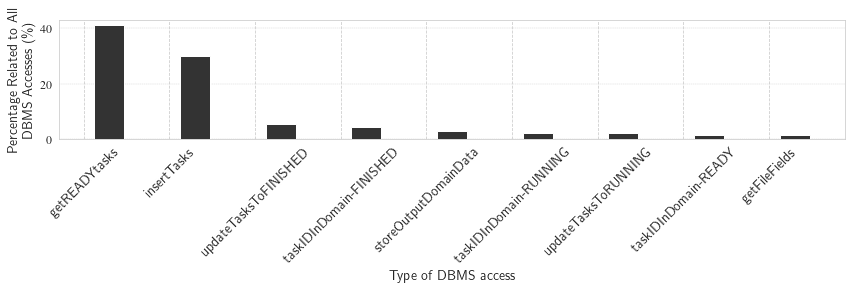

In [10]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=FIG_SIZE, nrows=1, ncols=1)
palette = DEFAULT_PALETTE[:1]

x = list(exp6_data.keys())
y = list(exp6_data.values())
width = 0.35

ax.grid('on', which='major', axis='y', linestyle='--', linewidth=0.4, zorder=0) 
ax.bar(x=x, 
        height=y,
        width=width,
        color=palette[0],
        zorder=2
      )

ax.set_ylabel("Percentage Related to All\nDBMS Accesses (\%)", fontsize=MEDIUM_SIZE, fontweight="bold")
ax.set_xlabel("Type of DBMS access", fontsize=MEDIUM_SIZE, fontweight="bold")
ax.set_axisbelow(True)

ax.set_xticklabels(x, fontsize=MEDIUM_SIZE)
plt.xticks(np.array(range(len(x)))-0.3, fontsize=MEDIUM_SIZE, rotation=45)


plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)
plt.savefig('exp6.pdf', format='pdf', dpi=1000, bbox_inches = 'tight')

# Experiment 7

In [11]:
#Workload: 23k tasks, 5s on average
exp7_data = {
"With runtime queries": 17.02,
"Without runtime queries": 16.580233
}

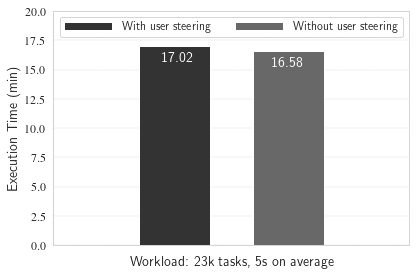

In [12]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=(6,4), nrows=1, ncols=1)
palette = DEFAULT_PALETTE[:2]

x = np.arange(len(exp7_data))
y = list(exp7_data.values())
width = 0.2
sft = width*1.7
ax.grid('on', which='major', axis='y',linestyle='--', linewidth=0.4, zorder=0) 
ax.bar(x=x[0]+sft, 
        height=y[0],
        width=width,
        color=palette[0],
        label='With user steering',
        zorder=2
      )
plt.text((x[0]+sft)*0.9, y[0]*0.92, '%.2f' % y[0], fontsize=MEDIUM_SIZE, color='white')

ax.bar(x=x[1]-sft, 
        height=y[1],
        width=width,
        color=palette[1],
        label='Without user steering',
        zorder=2
      )
plt.text((x[1]-sft)*0.93, y[1]*0.92, '%.2f' % y[1], fontsize=MEDIUM_SIZE, color='white')

ax.legend(ncol=2, loc='upper center', fontsize=SMALL_SIZE, handlelength=4)#, loc=(0, .7))
ax.set_ylabel("Execution Time (min)", fontsize=MEDIUM_SIZE, fontweight='bold')
ax.set_xlabel("Workload: 23k tasks, 5s on average", fontsize=MEDIUM_SIZE, fontweight='bold')
ax.set_axisbelow(True)


ax.set_xticklabels("", fontsize=MEDIUM_SIZE)
plt.xticks([0,1])
#plt.yticks(fontsize=MEDIUM_SIZE)
plt.ylim(0,20)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)
plt.savefig('exp7.pdf', format='pdf', dpi=1000, bbox_inches = 'tight')

# Experiment 8

In [13]:
exp8_data = pd.read_csv('data/exp8.csv')
exp8_data = exp8_data.set_index('System')
exp8_data

,"5k tasks, 1 s","5 k, tasks 16 s","20 k, tasks 1 s","20 k tasks, 16 s"
System,,,,
d-Chiron,4.957850,9.470767,5.512583,9.51695
Chiron,11.368383,11.654717,61.492717,63.16705


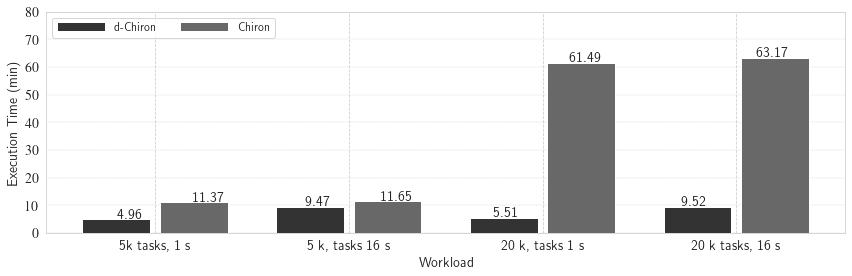

In [14]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=FIG_SIZE, nrows=1, ncols=1)
palette = DEFAULT_PALETTE[:2]

x = np.arange(len(exp8_data.columns))
width = 0.35
sft = 0.2

y = np.array(exp8_data.query("System == 'd-Chiron'"))[0]
ax.grid('on', which='major', axis='y',linestyle='--', linewidth=0.4, zorder=0) 
ax.bar(x=x-sft, 
        height=y,
        width=width,
        color=palette[0],
        label='d-Chiron',
        zorder=2
      )

for i in x:
    plt.text((x[i]-sft)*0.97, y[i]*1.05, '%.2f' % y[i], fontsize=MEDIUM_SIZE)

    
y = np.array(exp8_data.query("System == 'Chiron'"))[0]
ax.bar(x=x+sft, 
        height=y,
        width=width,
        color=palette[1],
        label='Chiron',
        zorder=2
      )
for i in x:
    plt.text((x[i]+sft)*0.97, y[i]*1.01, '%.2f' % y[i], fontsize=MEDIUM_SIZE)

    
ax.legend(ncol=2, loc='upper left', fontsize=SMALL_SIZE, handlelength=4)#, loc=(0, .7))
ax.set_ylabel("Execution Time (min)", fontsize=MEDIUM_SIZE, fontweight="bold")
ax.set_xlabel("Workload", fontsize=MEDIUM_SIZE, fontweight="bold")
ax.set_axisbelow(True)


ax.set_xticklabels(exp8_data.columns, fontsize=MEDIUM_SIZE)
plt.xticks(x, fontsize=MEDIUM_SIZE)
plt.yticks(fontsize=MEDIUM_SIZE)
plt.ylim(0,80)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)
plt.savefig('exp8.pdf', format='pdf', dpi=1000, bbox_inches = 'tight')